### Charalambos Tsioutis



**Instructions:**
* go through the notebook and complete the **tasks** .  
* Make sure you understand the examples given
* When a question allows a free-form answer (e.g., ``what do you observe?``) create a new markdown cell below and answer the question in the notebook.
* ** Save your notebooks when you are done**

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Run the cell below to load the digits dataset. 

In [1]:
%matplotlib inline


from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()

#view a description of the dataset (uncomment next line to do so)
print(digits.DESCR)

#Set X equal to features, Y equal to the targets

X=digits.data 
y=digits.target 



.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many data samples do we have?  Print the value below using ``shape`` on X appropriately.

In [2]:
X.shape[0]

1797

Every row of the dataset it is a sample of measurment

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many features do we have?  Print the value below using ``shape`` on X appropriately.

In [3]:
X.shape[1]

64

every data sample coresponds to 64 attributes- features

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many classes do we have?  Print the value below using ``np.unique`` appropriately.

In [4]:
len(np.unique(y))


10

classes are the unique target variables.

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many samples do we have that belong to class 3?  Use the ``np.where`` function appropriately on y to print this in the cell below.

In [5]:
index =  np.where(y==3)
print(f"we have {X[index,:].shape[1]} samples that belong to class 3 ")

we have 183 samples that belong to class 3 


* find the indeces in y where y = 3
* the samples that belong to class 3 are the rows with the indeces we found


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Select a random sample from the dataset.  Plot the sample as an image by doing the appropriate reshaping to the feature vector. You can use the ```matplotlib``` function ```imshow``` to do so.  Additionally, set the horizontal axis to show the label of the chosen sample.

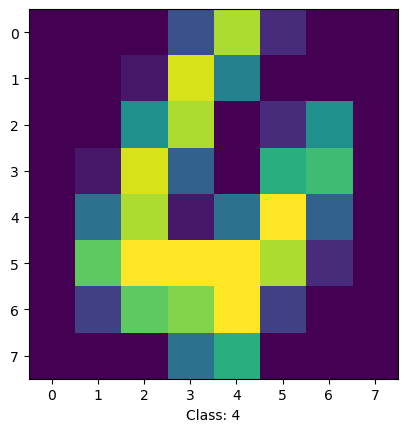

In [9]:
index = np.random.randint(0, len(X))
sample = X[index]
Class = y[index]
img = sample.reshape((8, 8))
plt.imshow(img)
plt.xlabel(f"Class: {Class}")
plt.show()

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Use principal component analysis (from sklearn.decomposition import PCA) to reduce the dimensionality of the problem to 2 dimensions, and then visualize the data (using plt.scatter).  How does the plot change when we replace `Xn=X` to `Xn=X+np.random.normal(0,5,X.shape)`?  You can also try to increase the standard deviation of the noise.

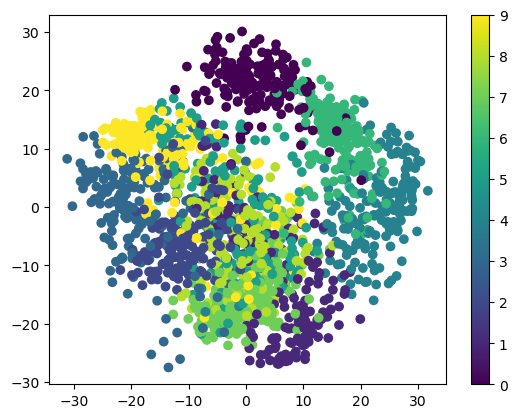

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.colorbar()
plt.show()

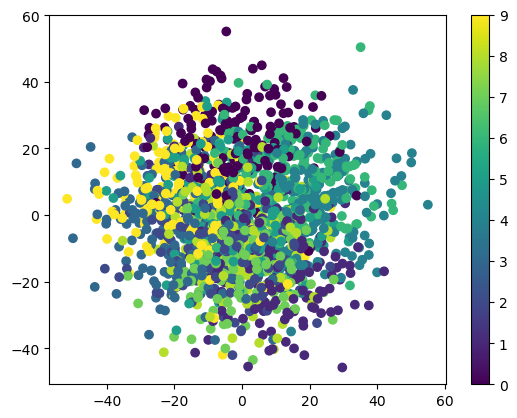

In [19]:
Xn = X + np.random.normal(0, 10, X.shape)
pca = PCA(n_components=2)
Xn_pca = pca.fit_transform(Xn)
plt.scatter(Xn_pca[:, 0], Xn_pca[:, 1], c=y)
plt.colorbar()
plt.show()

As we give an input noise in the dataset (and also increase that noise), the individual classes are getting wider and harder to distinct.

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Your task is to train a k-NN classifier using scikit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) on the DIGITS dataset loaded above.

Compare the accuracy (a) on the original data, (b) when adding noise to our data as above

Use 10 neighbours and the euclidean distance function. 20% of the data should be used for training.

Use scikit-learn **only** for k-NN, while using numpy functions for the rest of the code

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#use 20% of data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)
print(f"Accuracy of model: {acc}")



Accuracy of model: 0.9972222222222222


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
Xn = X + np.random.normal(0, 5, X.shape)
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(Xn_train, yn_train)
acc = knn.score(Xn_test, yn_test)
print(f"Accuracy: {acc}")

Accuracy: 0.9083333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
